
# Relative Binding Free Energy Calculation of a Pair of Congeneric Small Molecules Towards the Same Protein Target: A Free Energy Perturbation (FEP) Tutorial Using NAMD

This notebook is written by quantaosun@gmail.com in Shanghai, China, 2021. 

This notebook is designed to run a very short FEP simulation on local NAMD to let you find and fix errors before finally submit job to HPC clusters.

The parameter setting would have a huge impact on result, this notebook is only for learning purpose, to use it in practice research, use at your own risk.

In [ ]:
Things to consider using this FEP protocol
How good do you understand your protein, like are you sure there is no broken loops or modified
residues?
Are these two molecules share a common mother core or at least share a 60% of similarity?
How do you align your two molecules, which one is the reference, and which one is mutation?
Is your protein a dimer or multiple polymers when executing its biological functions?
Finally, are you in a situation, that one of the pairs of molecules is charged while the other one is
not?

**Resources required**
1. Github repository quantaosun/NAMD-FEP
2. LigParGen server
3. Feprepare server
4. Schrodinger Maestro 2018-4 version and above
5. NAMD-2.13-mpi
6. VMD 2019 and above
7. Sublime text editor


# Download and install NAMD, put namd executable to PATH

make sure you can call "namd2" from your terminal before move on

# Step 1, Maestro preparation for protein

The crystal structures are 1MQ5 and 1MQ6, the ligand from 1MQ5 (XLC) will be taken as reference,
ligand from 1MQ6 (XLD) as mutation and the fundamental question is, is XLD a better ligand
compared to XLC, in terms of binding to the same protein target?

The first thing to do, is to CAREFULLY prepare your protein in Maestro, make sure you tick the "fill
missing loops" option.

Use Get PDB by ticking the "biology unit" option, otherwise filling missing loops may fail
There are two chains, A and L, the ligand binds to the green chain A, for the sake of this tutorial,
chain L was deleted, but ideally, you should keep it in an FEP calculation, especially when it plays
a role in helping the small molecule binding.

All waters and other co-factors were deleted, only XLC ligand was kept as the Reference ligand.

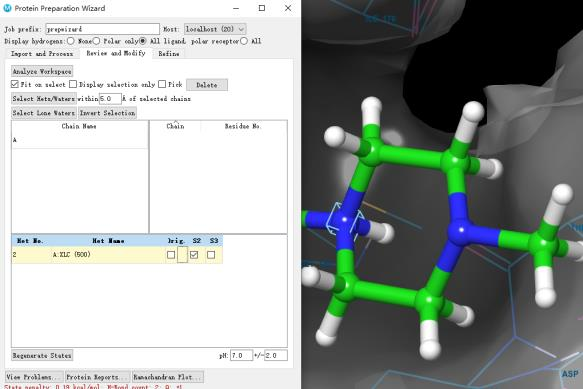

You may have noticed that the generated state for XLC is protonated at the nitrogen position,
i.e., the molecule brings one positive charge, keep that in mind.
Continue to finish the protein preparation procedure.
DO THE SAME PEROCEDURE FOR 1MQ6.

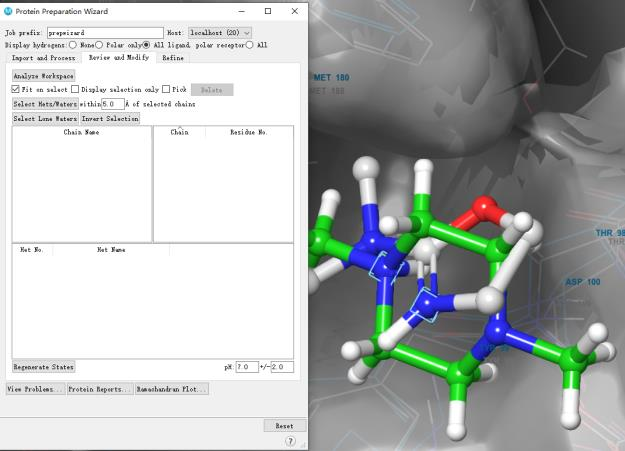

Having finished all preparation for XLD and XLC, both have a charge near the mutation area (image
above ). You could have a better vision by the selected rectangle atoms shown below.

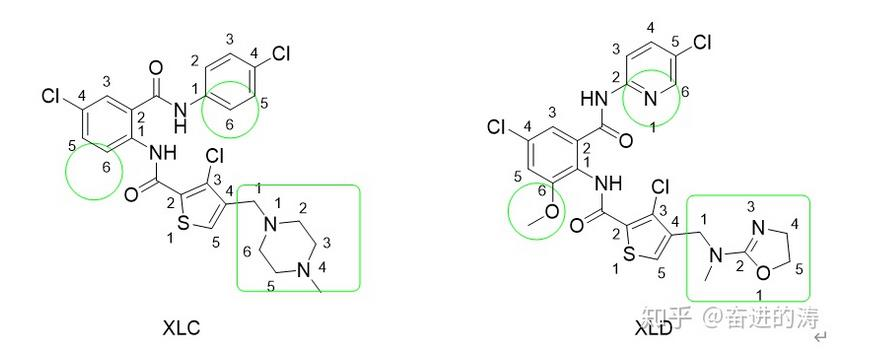

It has turned out with a positive charge, the Feprepare web serves returned an error, making it not
possible to generate the input files for further simulation.
Both small molecules were then decided to be put back to their original state, i.e., the neutral states,
with a proper record of the corresponding protonation state penalty, S1 and S2, at the end of the
FEP, the ΔΔG = ΔΔG(FEP) +( S2-S1).

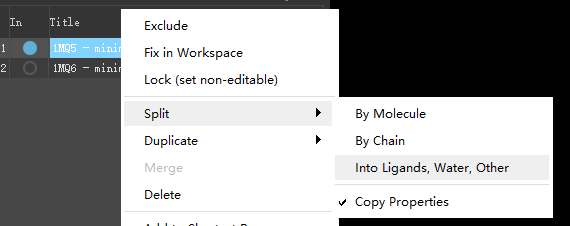

Now, split the entry into ligands, water, others, then delete anything else but the next three entries,
please double-check the protonation state of small molecules are neutral.

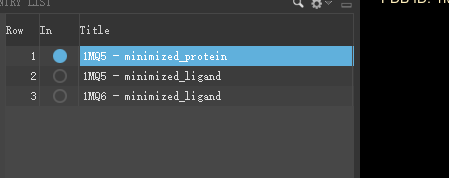

Now let's align the mutation XLD to the reference XLC

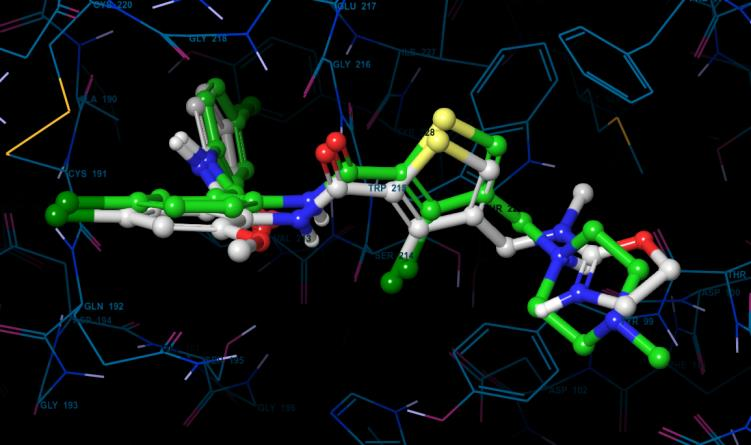

the two ligands are already in a good position with each other, but for the sake of an easier fep
calculation, we want an even better alignment.

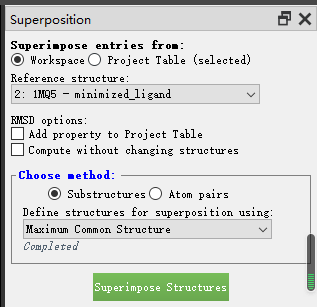

While the module you should use on the 2020 version of Schrodinger (maestro 12.6) is called
"superimpose structures", after alignment, now the two looks like

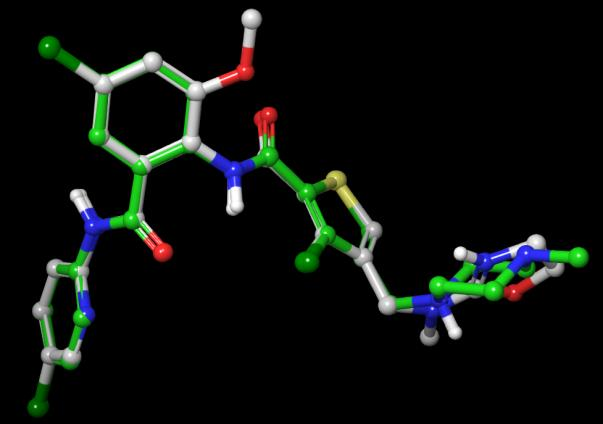

Note: In some other cases, you derive your mutation from your reference with the build tool in
Maestro, in that situation, the two ligands are already naturally aligned so you don't have to do
anything else to align them again.

After the alignment is done. Let's save the XLC.pdb, XLD.pdb.

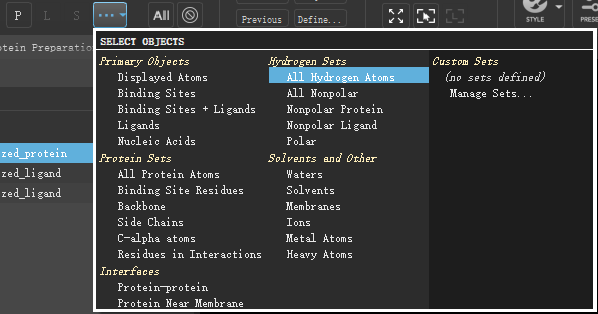

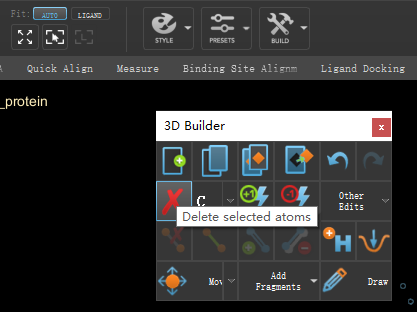

Select all the hydrogens for the protein and use the build tool to delete all the selected H atoms,
then save the protein.PDB

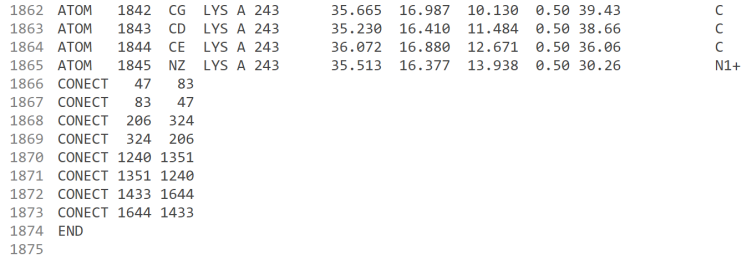

now you are suggested to open the protein. PDB with Sublime text editor and scroll down to the
bottom to delete all the "CONNECT" lines, and save the file.

Do the same manipulation for your two small-molecule files as well.

# Step 2 Files uploaded to LigParGen webserver http://zarbi.chem.yale.edu/ligpargen/

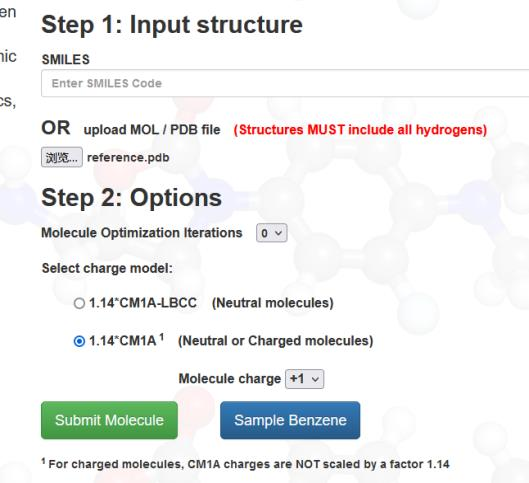

Upload reference.PDB and mutation. PDB to the server one by one, download RTF and PRM files,
separately. Make sure you select the right charge, 0, in our case (ignore the image above).

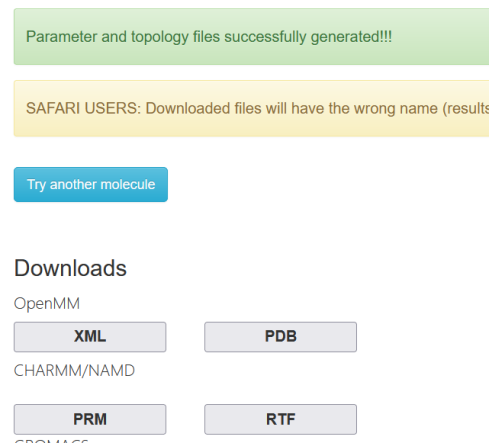

Be careful about the names, the LigPargen may have renamed your file, just be sure which is which

# Step 3 Upload files to Feprepare webserver https://feprepare.vi-seem.eu/

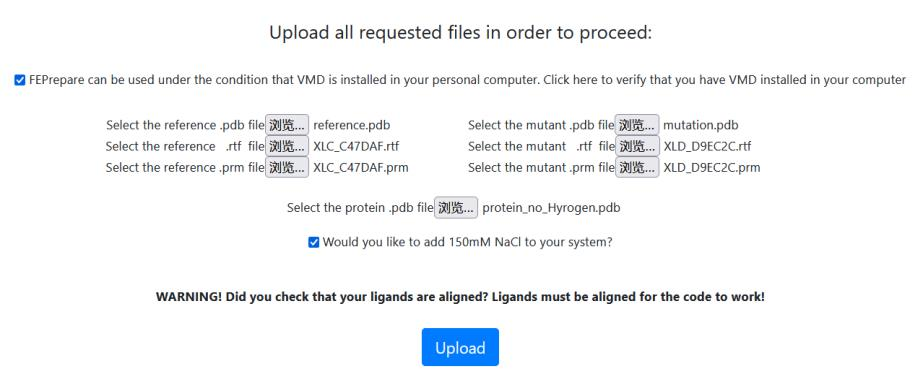

Upload all necessary files as above, then click upload. After finish,
Click the download files button, and save the zip file

# Step 4 Input file structure explained

Upload the downloaded zip file from Feprepare to your remote cluster or your working states if
you have one. In my case, I upload this file through the FileZilla client.
You could also use the SSH command if you can copy the zip file to the remote cluster.

It is always good to run a short rehesal version of the whole process on local laptop to make sure all parameters are good to be run on HPC, that is what all about for all the rest of this tutorial.

Next, we need to unzip and modify these files a bit before they could be used in the simulation.

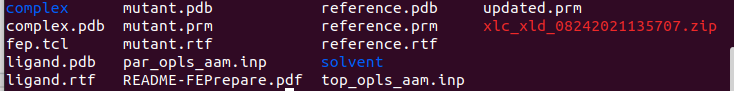

The structure of the files is there are two folders namely “complex” and “solvent”, the plan is we
do both forward and backward simulation for complex and solvent, respectively, then ΔΔG(FEP)
= dG(complex) – dG(solvent). Don’t worry, we will learn how to calculate dG(complex) and
dG(solvent) by VMD later. Inside the folder like below

Now let’s start with entering the complex folder.

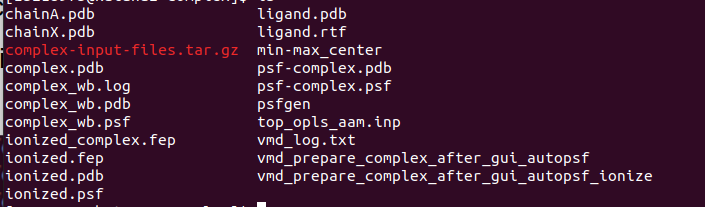

The red tar.gz file contains all the configuration files we need, just extract it with tar command.

# Step 5 Modify NAMD configuration files https://github.com/quantaosun/fep_prepare

Just remember to make sure all defined parameters inside the .namd file could be found, e.g.,
the location of the toppar folder should be placed correctly to the current folder displayed below.
Change the simulation steps based on your need, at the end of the *.namd file, change the
periodical condition values as well if you use a crystal structure different from this tutorial.

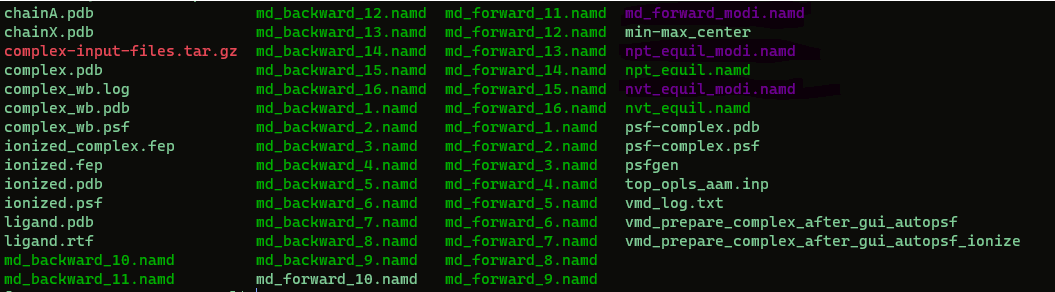

It should be emphasized that I did not apply the way Feprepare default simulation logics, i.e., run
the md_forward_namd one by one from 1 to 16, then backward from 1 to 16, you could do that if
you are confident enough to handle everything, but in this tutorial, I just decide to only handle
three configuration files, namely the nvt_equil_modi.namd, npt_equil_modi.namd and the
md_forward_modi.namd and md_backward_modi.namd, since inside md_forward and
md_backward file, there are also a 16 lambda windows defined, so they are still a fair equivalent
to the default way to do the job. The only reason I go this way is it is unlikely to mess things up
since there are fewer files to deal with.

# You can SKIP next cell, I put these crazy commands here just to let you know what I have done to modify the default configuration files. If this stuff make you scratch your head just ignore them and move on.

In [ ]:
#!/bin/bash
# This little script is written by Quantao for the purpose of preparing input files
#for NAMD based Free Energy Pertubation calculation. 
#Please download the zip file from "Feprepare web server" to the same folder as this script is, also please make sure the 
#parameter_patch2.txt and toppar_modified should be in the folder as per the structure 
#below.

                                  ##### your folder to run the calculation should look like this #####
                                                                #                      
                                                                #
                                                                #
    ###################################################################################################################################
    #                  #              #                  #             #                   #              #             #             #
    #                  #              #                  #             #                   #              #             #             #
#files.zip  toppar_modified.zip  parameter_patch2.txt  1.sh         lambda.txt          README.md       LICENSE       2.1.pbs        2.2.sh
     
unzip files.zip # tar -xvf files.tar.gz
cd files # in case the folder name is random, this cd to the first one.
cp ../toppar_modified.zip ./
unzip toppar_modified.zip
cd complex
tar -xzvf *.tar.gz  # this is the conf files
mkdir complex-input-files
mkdir complex-output-files
mv *.namd complex-input-files/
cd complex-input-files/
############complex NVT script modification ##################################
head -n 13 nvt_equil.namd > output1
cat ../../../parameter_patch2.txt >> output1
tail -n +14 nvt_equil.namd > output2
cat output2 >> output1
# change the numSteps from 500000 to 50000
# change the numMinSteps from 50000 to 5000
mv output1 nvt_equil_modi.namd
# you could manually define the output path to ../complex-output-files
############complex NPT script modification #####################################
head -n 13 npt_equil.namd > output3
cat ../../../parameter_patch2.txt >> output3
tail -n +14 npt_equil.namd > output4
cat output4 >> output3
#mannuall change the numSteps from 500000 to 50000.
mv output3 npt_equil_modi.namd
# you could manually define the output path to ../complex-output-files
###############complex Production script modification #################################
tail -n 3 md_forward_1.namd > tmp2.txt
echo "alchEquilSteps          500
      set numSteps            50000" > tmp2.txt  # overwrite the original Lambda0 Lambda2 format
cat ../../../lambda.txt >> tmp2.txt  # you could adjust this file to have different windows numbers.
cat tmp2.txt >> md_forward_1.namd
#To uncomment lines 137 through 141 to close the one by one simulation.
sed -i '137,141 s/^/#/' md_forward_1.namd    #double check the line numbers.
head -n 123 md_forward_2.namd > outputA
tail -n +124 md_forward_2.namd > outputB
echo "source     ../../fep.tcl" >> outputA
cat outputB >> outputA
mv outputA md_forward_modi.namd
#################### To modify the alchFile section #############################                                                
head -n 13 md_forward_2.namd > output5
cat ../../../parameter_patch2.txt >> output5
tail -n +14 md_forward_2.namd > output6
sed -i '/^alchDecouple/s/off/yes/' output6           # turn on the "alchDecouple"
cat output6 >> output5
mv output5 md_forward_modi.namd


############################################################################
cd ../../ # prepare to cd to solvent folder. ##SWITCH TO SOLVENT
###########################################################################
cd solvent
tar -xzvf *.tar.gz # extract all the conf files
mkdir solvent-input-files
mkidr solvent-output-files
mv *.namd solvent-input-files/
cd solvent-input-files/
############solvent NVT script modification ##################################
head -n 13 nvt_equil.namd > output1
cat ../../../parameter_patch2.txt >> output1
tail -n +14 nvt_equil.namd > output2
cat output2 >> output1
mv output1 nvt_equil_modi.namd
#change margin from 1 to 30.0
# mannually change numSteps from 500000 to 50000
# change the numMinSteps from 50000 to 5000 
# you could manually define the output path to ../solvent-output-files
############solvent NPT script modification #####################################
head -n 13 npt_equil.namd > output3
cat ../../../parameter_patch2.txt >> output3
tail -n +14 npt_equil.namd > output4
cat output4 >> output3
#manually change the numSteps from 500000 to 50000.
mv output3 npt_equil_modi.namd
# you could manually define the output path to ../complex-output-files
###############solvent Production script modification #################################
tail -n 3 md_forward_3.namd > tmp2.txt
echo "alchEquilSteps          500
      set numSteps            50000" > tmp2.txt 
cat ../../../lambda.txt >> tmp2.txt  
cat tmp2.txt >> md_forward_3.namd
#To uncomment lines 136 through 140 to close the one by one simulation.
sed -i '136,140 s/^/#/' md_forward_2.namd        
head -n 123 md_forward_2.namd > outputA
tail -n +124 md_forward_2.namd > outputB
echo "source     ../../fep.tcl" >> outputA
cat outputB >> outputA
mv outputA md_forward_modi.namd
#################### To modify the alchFile section #########################                                                
head -n 13 md_forward_modi.namd > output5
cat ../../../parameter_patch.txt >> output5
tail -n +14 md_forward_2.namd > output6       
sed -i '/^alchDecouple/s/off/yes/' output6    
cat output6 >> output5
mv output5 md_forward_modi.namd
grep X ../ionized_solvent.fep # validate the fep file is is good.
echo "If you don't see the X labeled atoms, please go back to check your input"
grep X ../../complex/ionized_complex.fep  # validate the fep file is is good.
cat X1.txt
echo "If you don't see the X labeled atoms, please go back to check your input"


Warning: for a testing simulatino, the output and restart frequency should be tuned down at the same time. If the output frequency is larger than the nsteps, NaN error may happen.

# nvt_equil_modi.namd

In [ ]:
com_file = open('nvt_equil_test.namd','w')
com_file.write('''
###################################################
# NVT EQUILIBRATION
###################################################


# INPUT

set temp                310.0

vdwGeometricSigma	yes
parameters              ../par_opls_aam.inp
parameters              ../updated.prm
parameters              ../reference.prm

parameters              ../../toppar/par_all36m_prot.prm
parameters              ../../toppar/par_all36_na.prm
parameters              ../../toppar/par_all36_carb.prm
parameters              ../../toppar/par_all36_lipid.prm
parameters              ../../toppar/par_all36_cgenff.prm
#parameters              ../../toppar/par_interface.prm
parameters              ../../toppar/toppar_all36_nano_lig.str
parameters              ../../toppar/toppar_all36_nanolig_patch.str
parameters              ../../toppar/toppar_all36_synthetic_polymer.str
parameters              ../../toppar/toppar_all36_synthetic_polymer_patch.str
parameters              ../../toppar/toppar_all36_polymer_solvent.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters              ../../toppar/toppar_dum_noble_gases.str
#parameters              ../../toppar/toppar_ions_won.str
parameters              ../../toppar/toppar_all36_prot_arg0.str
#parameters              ../../toppar/toppar_all36_prot_c36m_d_aminoacids.str
parameters              ../../toppar/toppar_all36_prot_fluoro_alkanes.str
parameters              ../../toppar/toppar_all36_prot_heme.str
parameters              ../../toppar/toppar_all36_prot_na_combined.str
parameters              ../../toppar/toppar_all36_prot_retinol.str
parameters              ../../toppar/toppar_all36_prot_modify_res.str
parameters              ../../toppar/toppar_all36_na_nad_ppi.str
parameters              ../../toppar/toppar_all36_na_rna_modified.str
parameters              ../../toppar/toppar_all36_lipid_archaeal.str
#parameters              ../../toppar/toppar_all36_lipid_bacterial.str
parameters              ../../toppar/toppar_all36_lipid_cardiolipin.str
#parameters              ../../toppar/toppar_all36_lipid_cholesterol.str
parameters              ../../toppar/toppar_all36_lipid_dag.str
parameters              ../../toppar/toppar_all36_lipid_inositol.str
parameters              ../../toppar/toppar_all36_lipid_lps.str
parameters              ../../toppar/toppar_all36_lipid_miscellaneous.str
parameters              ../../toppar/toppar_all36_lipid_model.str
parameters              ../../toppar/toppar_all36_lipid_prot.str
#parameters              ../../toppar/toppar_all36_lipid_sphingo.str
#parameters              ../../toppar/toppar_all36_lipid_yeast.str
parameters              ../../toppar/toppar_all36_lipid_hmmm.str
parameters              ../../toppar/toppar_all36_lipid_detergent.str
parameters              ../../toppar/toppar_all36_lipid_ether.str
parameters              ../../toppar/toppar_all36_carb_glycolipid.str
#parameters              ../../toppar/toppar_all36_carb_glycopeptide.str
parameters              ../../toppar/toppar_all36_carb_imlab.str
#parameters              ../../toppar/toppar_all36_label_spin.str
#parameters              ../../toppar/toppar_all36_label_fluorophore.str
parameters              ../../toppar/toppar_water_ions.mod.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters               top_all36_carb.rtf
#parameters                top_all36_cgenff.rtf
#parameters                top_all36_na.rtf
#parameters               top_all36_prot.rtf
#parameters               top-ign-cgenff.rtf
#parameters               top_opls_aam.inp
#parameters               toppar_all36_carb_glycopeptide.str
parameters               ../updated.prm

paraTypeCharmm          on


exclude                 scaled1-4
1-4scaling              1.0


# TOPOLOGY

structure               ionized.psf

# INITIAL CONDITIONS

coordinates             ionized_complex.pdb
temperature             $temp

# OUTPUT FREQUENCIES

outputenergies          250
outputtiming            250
outputpressure          250
restartfreq             250
XSTFreq                 250
dcdfreq                 250


# OUTPUT AND RESTART

outputname              nvt_equil
restartname             nvt_equil

binaryoutput            yes
binaryrestart           yes

# CONSTANT-T
langevin                on
langevinTemp            $temp
langevinDamping         1.0

# PME

PME                     yes
PMETolerance            10e-6
PMEInterpOrder          4

PMEGridSpacing          1.0

# Periodic Boundary Conditions
cellbasisvector1       -133.7     0       0
cellbasisvector2         0      -99.3     0
cellbasisvector3         0       0     -121.8
cellOrigin          1.4 21.6 37.4


# WRAP WATER FOR OUTPUT

wrapAll                 on
wrapwater               on

# CONSTANT-P

# LangevinPiston          on
# LangevinPistonTarget    1.01325
# LangevinPistonPeriod    100
# LangevinPistonDecay     50
# LangevinPistonTemp      $temp

# StrainRate              0.0 0.0 0.0
# useGroupPressure        yes

# useFlexibleCell         no

# SPACE PARTITIONING

stepspercycle           10
margin                  1.0

# CUT-OFFS

switching               on
switchdist              10.0
cutoff                  12.0
pairlistdist            14.0


# RESPA PROPAGATOR

timestep                2.0
fullElectFrequency      2
nonbondedFreq           1


# SHAKE

rigidbonds              all
rigidtolerance          0.000001
rigiditerations         400


# COM

ComMotion            no


# FEP PARAMETERS

source                  ../fep.tcl

alch                    on
alchType                fep
alchFile                ionized_complex.fep
alchCol                 B
alchOutFile             nvt_equil.fepout
alchOutFreq             100

alchVdwLambdaEnd        1.0
alchElecLambdaStart     0.5
alchVdWShiftCoeff       5.0
alchDecouple            off

alchEquilSteps          0
set numSteps            5000    ; # 0.5 ns

set numMinSteps         500

runFEPmin 0.0 0.0 0.0 $numSteps $numMinSteps $temp

''')
com_file.close()

# npt_equil_modi.namd

In [ ]:
com_file = open('npt_equil_test.namd','w')
com_file.write('''
###################################################
# NPT EQUILIBRATION
###################################################


# INPUT

set temp                310.0

vdwGeometricSigma	yes
parameters              ../par_opls_aam.inp
parameters              ../updated.prm
parameters              ../reference.prm

parameters              ../../toppar/par_all36m_prot.prm
parameters              ../../toppar/par_all36_na.prm
parameters              ../../toppar/par_all36_carb.prm
parameters              ../../toppar/par_all36_lipid.prm
parameters              ../../toppar/par_all36_cgenff.prm
#parameters              ../../toppar/par_interface.prm
parameters              ../../toppar/toppar_all36_nano_lig.str
parameters              ../../toppar/toppar_all36_nanolig_patch.str
parameters              ../../toppar/toppar_all36_synthetic_polymer.str
parameters              ../../toppar/toppar_all36_synthetic_polymer_patch.str
parameters              ../../toppar/toppar_all36_polymer_solvent.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters              ../../toppar/toppar_dum_noble_gases.str
#parameters              ../../toppar/toppar_ions_won.str
parameters              ../../toppar/toppar_all36_prot_arg0.str
#parameters              ../../toppar/toppar_all36_prot_c36m_d_aminoacids.str
parameters              ../../toppar/toppar_all36_prot_fluoro_alkanes.str
parameters              ../../toppar/toppar_all36_prot_heme.str
parameters              ../../toppar/toppar_all36_prot_na_combined.str
parameters              ../../toppar/toppar_all36_prot_retinol.str
parameters              ../../toppar/toppar_all36_prot_modify_res.str
parameters              ../../toppar/toppar_all36_na_nad_ppi.str
parameters              ../../toppar/toppar_all36_na_rna_modified.str
parameters              ../../toppar/toppar_all36_lipid_archaeal.str
#parameters              ../../toppar/toppar_all36_lipid_bacterial.str
parameters              ../../toppar/toppar_all36_lipid_cardiolipin.str
#parameters              ../../toppar/toppar_all36_lipid_cholesterol.str
parameters              ../../toppar/toppar_all36_lipid_dag.str
parameters              ../../toppar/toppar_all36_lipid_inositol.str
parameters              ../../toppar/toppar_all36_lipid_lps.str
parameters              ../../toppar/toppar_all36_lipid_miscellaneous.str
parameters              ../../toppar/toppar_all36_lipid_model.str
parameters              ../../toppar/toppar_all36_lipid_prot.str
#parameters              ../../toppar/toppar_all36_lipid_sphingo.str
#parameters              ../../toppar/toppar_all36_lipid_yeast.str
parameters              ../../toppar/toppar_all36_lipid_hmmm.str
parameters              ../../toppar/toppar_all36_lipid_detergent.str
parameters              ../../toppar/toppar_all36_lipid_ether.str
parameters              ../../toppar/toppar_all36_carb_glycolipid.str
#parameters              ../../toppar/toppar_all36_carb_glycopeptide.str
parameters              ../../toppar/toppar_all36_carb_imlab.str
#parameters              ../../toppar/toppar_all36_label_spin.str
#parameters              ../../toppar/toppar_all36_label_fluorophore.str
parameters              ../../toppar/toppar_water_ions.mod.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters               top_all36_carb.rtf
#parameters                top_all36_cgenff.rtf
#parameters                top_all36_na.rtf
#parameters               top_all36_prot.rtf
#parameters               top-ign-cgenff.rtf
#parameters               top_opls_aam.inp
#parameters               toppar_all36_carb_glycopeptide.str
parameters               ../updated.prm

paraTypeCharmm          on

exclude                 scaled1-4
1-4scaling              1.0


# TOPOLOGY

structure               ionized.psf

# INITIAL CONDITIONS

coordinates             ionized_complex.pdb
bincoordinates          nvt_equil.coor
binvelocities           nvt_equil.vel
extendedsystem          nvt_equil.xsc

# OUTPUT FREQUENCIES

outputenergies          250
outputtiming            250
outputpressure          250
restartfreq             250
XSTFreq                 250
dcdfreq                 250


# OUTPUT AND RESTART

outputname              npt_equil
restartname             npt_equil

binaryoutput            yes
binaryrestart           yes

# CONSTANT-T
langevin                on
langevinTemp            $temp
langevinDamping         1.0

# PME

PME                     yes
PMETolerance            10e-6
PMEInterpOrder          4

PMEGridSpacing          1.0

# Periodic Boundary Conditions
# cellBasisVector1    30.0    0   0
# cellBasisVector2     0    30.0   0
# cellBasisVector3     0    0    30.0
# cellOrigin          0.0 0.0 0.0


# WRAP WATER FOR OUTPUT

wrapAll                 on
wrapWater               on

# CONSTANT-P

LangevinPiston          on
LangevinPistonTarget    1.01325
LangevinPistonPeriod    100
LangevinPistonDecay     50
LangevinPistonTemp      $temp

StrainRate              0.0 0.0 0.0
useGroupPressure        yes

useFlexibleCell         no

# SPACE PARTITIONING

stepspercycle           10
margin                  30.0

# CUT-OFFS

switching               on
switchdist              10.0
cutoff                  12.0
pairlistdist            14.0


# RESPA PROPAGATOR

timestep                2.0
fullElectFrequency      2
nonbondedFreq           1


# SHAKE

rigidbonds              all
rigidtolerance          0.000001
rigiditerations         400


# COM

ComMotion           	no


# FEP PARAMETERS

source                  ../fep.tcl

alch                    on
alchType                fep
alchFile                ionized_complex.fep
alchCol                 B
alchOutFile             npt_equil.fepout
alchOutFreq             100

alchVdwLambdaEnd        1.0
alchElecLambdaStart     0.5
alchVdWShiftCoeff       5.0
alchDecouple            off

alchEquilSteps          0
set numSteps            5000       ; # 0.5 ns as a total

runFEP 0.0 0.0 0.0 $numSteps

''')
com_file.close()
!vmd -dispdev text -e psfgen.tcl

# md_forward_modi.namd

In [ ]:
com_file = open('md_forward_test.namd','w')
com_file.write('''
###################################################
# MD FORWARD
###################################################


# INPUT

set temp                310.0

vdwGeometricSigma	yes
parameters              ../par_opls_aam.inp
parameters              ../updated.prm
parameters              ../reference.prm

parameters              ../../toppar/par_all36m_prot.prm
parameters              ../../toppar/par_all36_na.prm
parameters              ../../toppar/par_all36_carb.prm
parameters              ../../toppar/par_all36_lipid.prm
parameters              ../../toppar/par_all36_cgenff.prm
#parameters              ../../toppar/par_interface.prm
parameters              ../../toppar/toppar_all36_nano_lig.str
parameters              ../../toppar/toppar_all36_nanolig_patch.str
parameters              ../../toppar/toppar_all36_synthetic_polymer.str
parameters              ../../toppar/toppar_all36_synthetic_polymer_patch.str
parameters              ../../toppar/toppar_all36_polymer_solvent.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters              ../../toppar/toppar_dum_noble_gases.str
#parameters              ../../toppar/toppar_ions_won.str
parameters              ../../toppar/toppar_all36_prot_arg0.str
#parameters              ../../toppar/toppar_all36_prot_c36m_d_aminoacids.str
parameters              ../../toppar/toppar_all36_prot_fluoro_alkanes.str
parameters              ../../toppar/toppar_all36_prot_heme.str
parameters              ../../toppar/toppar_all36_prot_na_combined.str
parameters              ../../toppar/toppar_all36_prot_retinol.str
parameters              ../../toppar/toppar_all36_prot_modify_res.str
parameters              ../../toppar/toppar_all36_na_nad_ppi.str
parameters              ../../toppar/toppar_all36_na_rna_modified.str
parameters              ../../toppar/toppar_all36_lipid_archaeal.str
#parameters              ../../toppar/toppar_all36_lipid_bacterial.str
parameters              ../../toppar/toppar_all36_lipid_cardiolipin.str
#parameters              ../../toppar/toppar_all36_lipid_cholesterol.str
parameters              ../../toppar/toppar_all36_lipid_dag.str
parameters              ../../toppar/toppar_all36_lipid_inositol.str
parameters              ../../toppar/toppar_all36_lipid_lps.str
parameters              ../../toppar/toppar_all36_lipid_miscellaneous.str
parameters              ../../toppar/toppar_all36_lipid_model.str
parameters              ../../toppar/toppar_all36_lipid_prot.str
#parameters              ../../toppar/toppar_all36_lipid_sphingo.str
#parameters              ../../toppar/toppar_all36_lipid_yeast.str
parameters              ../../toppar/toppar_all36_lipid_hmmm.str
parameters              ../../toppar/toppar_all36_lipid_detergent.str
parameters              ../../toppar/toppar_all36_lipid_ether.str
parameters              ../../toppar/toppar_all36_carb_glycolipid.str
#parameters              ../../toppar/toppar_all36_carb_glycopeptide.str
parameters              ../../toppar/toppar_all36_carb_imlab.str
#parameters              ../../toppar/toppar_all36_label_spin.str
#parameters              ../../toppar/toppar_all36_label_fluorophore.str
parameters              ../../toppar/toppar_water_ions.mod.str
#parameters              ../../toppar/toppar_water_ions.str
#parameters               top_all36_carb.rtf
#parameters                top_all36_cgenff.rtf
#parameters                top_all36_na.rtf
#parameters               top_all36_prot.rtf
#parameters               top-ign-cgenff.rtf
#parameters               top_opls_aam.inp
#parameters               toppar_all36_carb_glycopeptide.str
parameters               ../updated.prm


paraTypeCharmm          on

exclude                 scaled1-4
1-4scaling              1.0


# TOPOLOGY

structure               ionized.psf

# INITIAL CONDITIONS

coordinates             ionized_complex.pdb
bincoordinates          npt_equil.coor
binvelocities           npt_equil.vel
extendedsystem          npt_equil.xsc

# OUTPUT FREQUENCIES

outputenergies          250
outputtiming            250
outputpressure          250
restartfreq             250
XSTFreq                 250
dcdfreq                 250


# OUTPUT AND RESTART

outputname              md_forward_modi
restartname             md_forward_modi

binaryoutput            yes
binaryrestart           yes

# CONSTANT-T
langevin                on
langevinTemp            $temp
langevinDamping         1.0

# PME

PME                     yes
PMETolerance            10e-6
PMEInterpOrder          4

PMEGridSpacing          1.0

# Periodic Boundary Conditions
# cellBasisVector1    30.0    0   0
# cellBasisVector2     0    30.0   0
# cellBasisVector3     0    0    30.0
# cellOrigin          0.0 0.0 0.0


# WRAP WATER FOR OUTPUT

wrapAll                 on
wrapWater               on

# CONSTANT-P

LangevinPiston          on
LangevinPistonTarget    1.01325
LangevinPistonPeriod    100
LangevinPistonDecay     50
LangevinPistonTemp      $temp

StrainRate              0.0 0.0 0.0
useGroupPressure        yes

useFlexibleCell         no

# SPACE PARTITIONING

stepspercycle           10
margin                  1.0

# CUT-OFFS

switching               on
switchdist              10.0
cutoff                  12.0
pairlistdist            14.0


# RESPA PROPAGATOR

timestep                2.0
fullElectFrequency      2
nonbondedFreq           1


# SHAKE

rigidbonds              all
rigidtolerance          0.000001
rigiditerations         400


# COM

ComMotion            no


# FEP PARAMETERS

# source                 ../../fep.tcl
source     ../fep.tcl

alch                    on
alchType                fep
alchFile                ionized_complex.fep
alchCol                 B
alchOutFile             md_forward_modi.fepout
alchOutFreq             100

alchVdwLambdaEnd        1.0
alchElecLambdaStart     0.5
alchVdWShiftCoeff       5.0
alchDecouple            yes

#alchEquilSteps          500000

#alchLambda		0.0
#alchLambda2		0.0625
#run		        5000000        ; # 5 ns
alchEquilSteps          500
set numSteps            5000       ; # 0.5 ns as a total

runFEP 0.0 1.0 0.0625 $numSteps 

''')
com_file.close()
!vmd -dispdev text -e solvate.tcl

# md_backward_modi.namd

In [ ]:
com_file = open('md_backward_test.namd','w')
com_file.write('''
###################################################
# MD BACKWARD
###################################################


# INPUT

set temp                310.0

vdwGeometricSigma	yes
parameters              ../../par_opls_aam.inp
parameters              ../../updated.prm
parameters              ../../reference.prm


paraTypeCharmm          on

exclude                 scaled1-4
1-4scaling              1.0


# TOPOLOGY

structure               ../ionized.psf

# INITIAL CONDITIONS

coordinates             ../ionized_complex.pdb
bincoordinates          md_forward_2.coor
binvelocities           md_forward_2.vel
extendedsystem          md_forward_2.xsc

# OUTPUT FREQUENCIES

outputenergies          250
outputtiming            250
outputpressure          250
restartfreq             250
XSTFreq                 250
dcdfreq                 250


# OUTPUT AND RESTART

outputname              md_backward_2
restartname             md_backward_2

binaryoutput            yes
binaryrestart           yes

# CONSTANT-T
langevin                on
langevinTemp            $temp
langevinDamping         1.0

# PME

PME                     yes
PMETolerance            10e-6
PMEInterpOrder          4

PMEGridSpacing          1.0

# Periodic Boundary Conditions
# cellBasisVector1    30.0    0   0
# cellBasisVector2     0    30.0   0
# cellBasisVector3     0    0    30.0
# cellOrigin          0.0 0.0 0.0


# WRAP WATER FOR OUTPUT

wrapAll                 on
wrapWater               on

# CONSTANT-P

LangevinPiston          on
LangevinPistonTarget    1.01325
LangevinPistonPeriod    100
LangevinPistonDecay     50
LangevinPistonTemp      $temp

StrainRate              0.0 0.0 0.0
useGroupPressure        yes

useFlexibleCell         no

# SPACE PARTITIONING

stepspercycle           10
margin                  1.0

# CUT-OFFS

switching               on
switchdist              10.0
cutoff                  12.0
pairlistdist            14.0


# RESPA PROPAGATOR

timestep                2.0
fullElectFrequency      2
nonbondedFreq           1


# SHAKE

rigidbonds              all
rigidtolerance          0.000001
rigiditerations         400


# COM

ComMotion            no


# FEP PARAMETERS

# source                 ../../fep.tcl
source     ../fep.tcl

alch                    on
alchType                fep
alchFile                ../ionized_complex.fep
alchCol                 B
alchOutFile             md_backward_2.fepout
alchOutFreq             100

alchVdwLambdaEnd        1.0
alchElecLambdaStart     0.5
alchVdWShiftCoeff       5.0
alchDecouple            off

#alchEquilSteps          500000

#alchLambda		0.9375
#alchLambda2		0.875
#run		        5000000        ; # 5 ns
alchEquilSteps          0
set numSteps            5000       ; # 0.5 ns as a total
runFEP 1.0 0.0 -0.0625 $numSteps

''')
com_file.close()
!vmd -dispdev text -e restrain.tcl

# Testing NAMD configuration files, if there is any error, try to fix it before we submit to HPC simulation.

In [ ]:
!namd2 nvt_equil_test.namd > nvt_test.log

# The logic here is, we try to run a short simulaiton, if there is no error, that is good. If is, then it means we need to some fix like go back nvt_equil_test.namd to modify or change things. So are the next three cells.

In [ ]:
!namd2 npt_equil_test.namd > npt_test.log

In [ ]:
!namd2 md_forward_test.namd > forward_test.log

In [ ]:
!namd2 md_backward_test.namd > backward_test.log

# Step 7 Result analysis

Ideally, you should use a Linux version of VMD, if you can't access one, then just use the
Windows version.

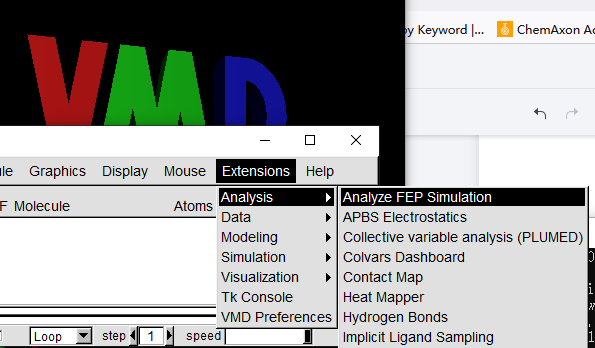

Find analyze FEP simulation from Extensions > analysis panel.

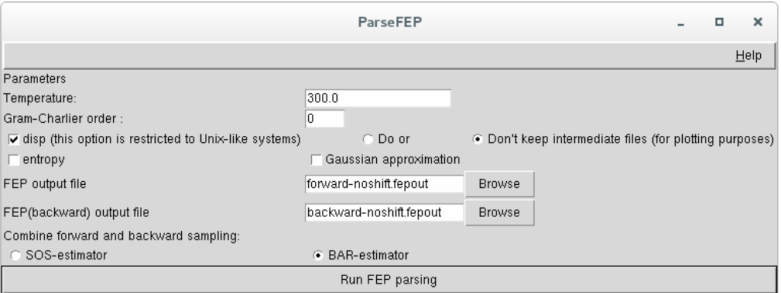

Change the temperature to your simulation value, select both forward and backward report files,
click Run FEP parsing, then you will get the ΔG complex, similarly, ΔG solvent was obtained.

In [ ]:
ΔΔG FEP = ΔG complex- ΔG solvent

In [ ]:
Remember the protonation state penalty we have discussed earlier, S1, S2.

In [ ]:
ΔΔG = ΔΔG FEP + (S2-S1)